# Content list 

### 1. Import Libraries and Data 
### 2. Data Cleaning 
### 3. Data Prep for Regression 
### 4. 

# 1. Import Libraries and Data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = R'/Users/shaquillelee/Documents/Task 6.1'

In [6]:
ufc_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'UFC_data_filled.csv'),index_col = 0)

## 2. Data Cleaning 

In [10]:
ufc_data.columns

Index(['Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class',
       'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=142)

In [80]:
pd.set_option('display.max_columns', None)

In [81]:
ufc_data.head()

,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",0,False,Bantamweight,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,0.000000,0.00,50.000000,20.000000,84.000000,45.000000,76.500000,41.000000,114.000000,64.000000,1.500000,1.000000,9.000000,6.500000,39.500000,11.000000,63.000000,27.500000,7.500000,7.000000,12.00000,9.000000,3.000000,2.000000,9.000000,8.500000,35.000000,12.500000,43.500000,17.500000,10.50000,4.500000,4.000000,3.000000,4.50000,3.000000,36.500000,24.500000,34.000000,277.500000,531.50000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.00000,0.000000,0.500000,0.460000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.000000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.000000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",0,False,Middleweight,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.0000,0.000000,0.00,65.500000,35.000000,50.000000,16.500000,113.500000,68.500000,68.500000,29.000000,2.500000,1.500000,0.500000,0.500000,46.000000,20.000000,36.000000,7.

In [11]:
ufc_data.shape

(6012, 142)

#### Missing Values 

In [12]:
ufc_data.isnull().sum()

Referee         32
date             0
location         0
Winner           0
title_bout       0
                ..
R_Height_cms     0
R_Reach_cms      0
R_Weight_lbs     0
B_age            0
R_age            0
Length: 142, dtype: int64

In [14]:
ufc_data.dropna(inplace = True)

In [15]:
ufc_data.isnull().sum()

Referee         0
date            0
location        0
Winner          0
title_bout      0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 142, dtype: int64

#### Duplicate Checks

In [20]:
dups = ufc_data.duplicated()

In [21]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
6000    False
6001    False
6002    False
6003    False
6005    False
Length: 5915, dtype: bool

These are not necessarily duplicated they a bool ubder the column letting us know if its a title fight or it isn't. The booleen consist of True or false. 

# 3. Data Prep for regression 

##### Hypothesis: 'The higher the average sigbificant strikes attempted, the higher the average significant strike landed'

In [82]:
#The '0' values in the dataset were filled in for missing values for our analysis we are going to take them out 
ufc_data = ufc_data[ufc_data['B_avg_SIG_STR_att'] != 0]
ufc_data = ufc_data[ufc_data['B_avg_SIG_STR_landed'] != 0]

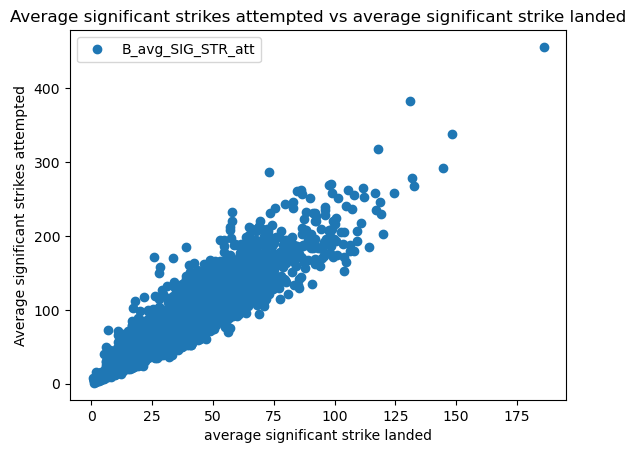

In [84]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

ufc_data.plot(x = 'B_avg_SIG_STR_landed', y ='B_avg_SIG_STR_att',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average significant strikes attempted vs average significant strike landed')  
plt.xlabel('average significant strike landed')  
plt.ylabel('Average significant strikes attempted')  
plt.show()

In [85]:
#Reshape the variables inro numpy arrays
X = ufc_data ['B_avg_SIG_STR_landed'].values.reshape(-1,1)
y = ufc_data ['B_avg_SIG_STR_att'].values.reshape(-1,1)

In [86]:
X

array([[20.    ],
       [35.    ],
       [57.9375],
       ...,
       [ 2.    ],
       [18.625 ],
       [14.    ]])

In [87]:
y

array([[ 50.    ],
       [ 65.5   ],
       [109.1875],
       ...,
       [  2.    ],
       [ 33.125 ],
       [ 28.    ]])

In [88]:
#Split data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

## 4. Regression Analysis 

In [89]:
#Create a Regression object 
regression = LinearRegression()

In [90]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [91]:
#Predict the value of y using X
y_predicted = regression.predict(X_test)

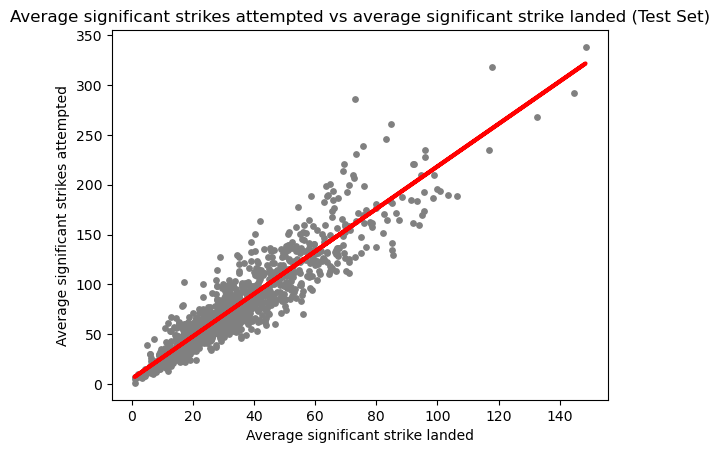

In [92]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average significant strikes attempted vs average significant strike landed (Test Set)')
plot_test.xlabel('Average significant strike landed')
plot_test.ylabel('Average significant strikes attempted')
plot_test.show()

In [93]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [94]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.13489904]]
Mean squared error:  347.3220630020182
R2 score:  0.8480904272113323


In [95]:
y_predicted

array([[161.69607252],
       [143.68286185],
       [162.99702662],
       ...,
       [ 76.43354202],
       [ 44.41005639],
       [ 98.31625721]])

In [96]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,163.062500,161.696073
1,113.000000,143.682862
2,171.500000,162.997027
3,83.875000,93.512734
4,8.119141,14.521470
5,28.500000,30.533213
6,23.000000,19.858717
7,29.484375,26.963928
8,49.500000,49.747304
9,75.789062,81.670716


##### Compare how the regression fits the training set

In [97]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [98]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [99]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.13489904]]
Mean squared error:  363.57941511192263
R2 score:  0.8472774472602591


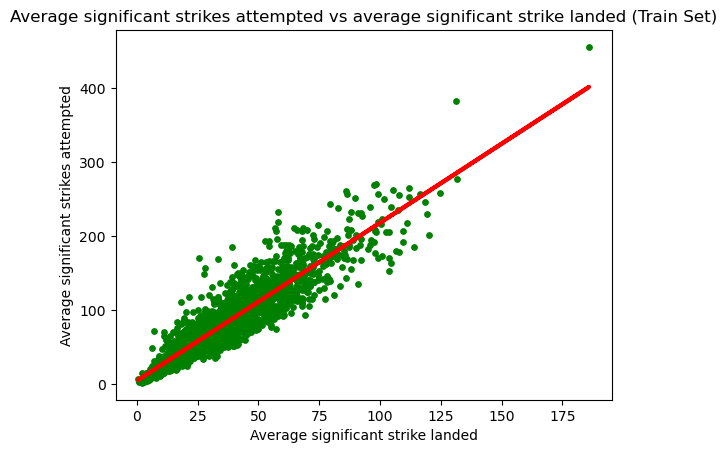

In [100]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average significant strikes attempted vs average significant strike landed (Train Set)')
plot_test.xlabel('Average significant strike landed')
plot_test.ylabel('Average significant strikes attempted')
plot_test.show()

- The slope is positive which means that theres a positive relationship. Hence, The slope here means that as X rises (as average significant strike landed rises), y Rises (the Average significant strikes attempted increases) at a degree of 2.134899.
- With an R2 of 0.847, which is close to 1 , we can say that its a good fit 
 - While most of the data points are close to the regression line, there are some points that are further away, indicating variability in the data. However, the overall pattern is consistent with a positive linear relatiomship.
- In summary, the plot indicates that as fighters attempt more significant strikes, they are likely to land more significant strikes